# Лабораторная работа № 6.1
## Эффект Мессбауэра

С помощью метода доплеровского сдвига мессбауэровской линиии поглощения исследуется резонансное поглощение гамма лучей, испускаемых ядрами олова в соединеннии BaSnO3 при комнатной температуре. Определяется положение максимума резонансного поглощения, его величина, а также экспериментальня ширина линии Гэкс. Оценивается время жизни возбужденного состояния ядра олова.

In [1]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.interpolate as scpint
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 50)

Загрузим данные

In [2]:
# фон в случае 1-ого и 2-ого поглотителей
backgroundAbsorber1 = 19.9
backgroundAbsorber2 = 20.7

In [3]:
dataLLUL = pd.read_csv("dataLLUL.csv")
dataAbsorber1 = pd.read_csv("dataAbsorber1.csv")
dataAbsorber2 = pd.read_csv("dataAbsorber2.csv")

In [4]:
dataLLUL

,"LL, V","I, 1/s"
0,0.0,105629.4
1,0.5,210.6
2,1.0,22.2
3,1.5,11.4
4,2.0,33.2
5,2.5,82.8
6,3.0,170.2
7,3.5,294.0
8,4.0,403.8
9,4.5,467.2


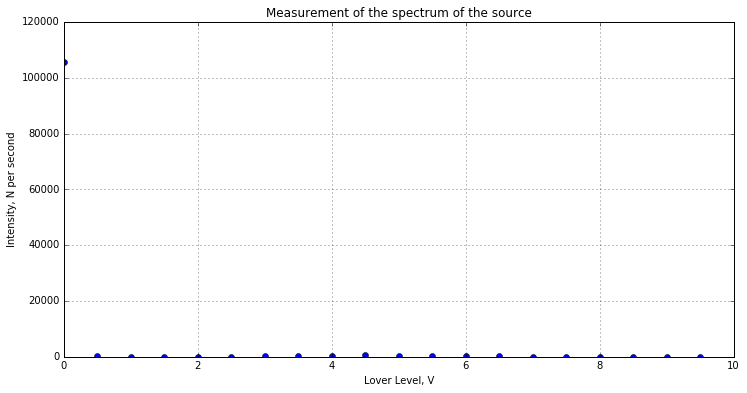

In [5]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

x = dataLLUL.values.T[0]
y = dataLLUL.values.T[1]

plt.xlabel(u'Lover Level, V')
plt.ylabel(u'Intensity, N per second')
plt.title(u'Measurement of the spectrum of the source')
plt.grid(True)

plt.plot(x, y, 'o', color='b')
plt.show()

Первое значение очень больше, ничего не видно, посмотрим без него.

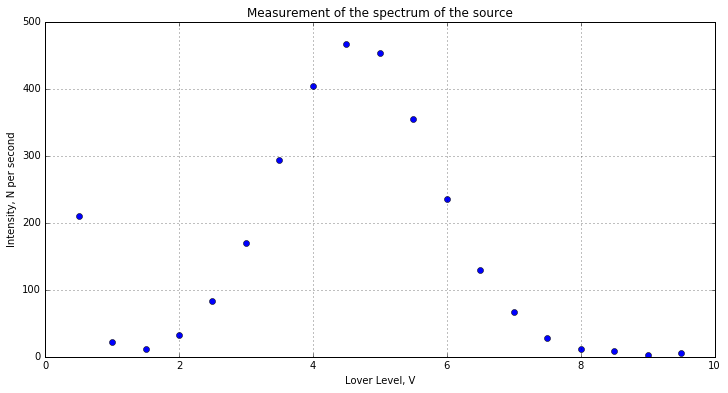

In [6]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

x = dataLLUL.values.T[0][1:]
y = dataLLUL.values.T[1][1:]

plt.xlabel(u'Lover Level, V')
plt.ylabel(u'Intensity, N per second')
plt.title(u'Measurement of the spectrum of the source')
plt.grid(True)

plt.plot(x, y, 'o', color='b')
plt.show()

Основываясь на этой картине выберем нижний порог в 1.8 В, а верхний в 9В.
Ход поглотителя 8.77 $\pm$ 0.02 мм

Построим график поглощения для первого поглотителя без вычета фона.

In [7]:
for i,v in enumerate(dataAbsorber1.values.T[0]):
    dataAbsorber1.values.T[0][i] = 0 - v
dataAbsorber1

,"V-, mm/s","I-, 1/s","V+, mm/s","I+, 1/s"
0,0.00,10506.6,0.00,10506.6
1,-4.85,5091.1,4.89,5065.5
2,-4.58,5148.6,4.60,5135.6
3,-4.23,5201.9,4.26,5159.2
4,-3.93,5211.4,3.97,5134.2
5,-3.57,5201.4,3.58,5089.1
6,-3.40,5222.9,3.41,5056.2
7,-3.08,5194.4,3.09,4986.2
8,-2.67,5181.9,2.72,4769.4
9,-2.28,5177.2,2.30,4640.2


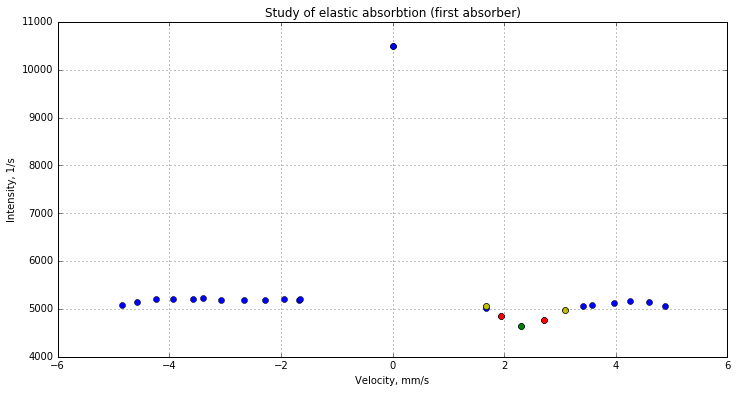

In [101]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

x = np.concatenate([dataAbsorber1.values.T[0], dataAbsorber1.values.T[2]]) 
y = np.concatenate([dataAbsorber1.values.T[1], dataAbsorber1.values.T[3]])

plt.xlabel(u'Velocity, mm/s')
plt.ylabel(u'Intensity, 1/s')
plt.title(u'Study of elastic absorbtion (first absorber)')
plt.grid(True)

plt.plot(x, y, 'o', color='b')
plt.plot(x[23], y[23], 'ro')
plt.plot(x[21], y[21], 'ro')
plt.plot(x[22], y[22], 'go')
plt.plot(x[20], y[20], 'yo')
plt.plot(x[25], y[25], 'yo')
plt.show()

Найдем амплитуду резонансного поглощения.

In [38]:
#Определим Ninf как среднее между максимальным и минимальным N в областях, где резонансное поглощение отсутствует
Ninf = 5134.2
Ninferr = np.sqrt(Ninf)
Nv = y.min()
Nverr = np.sqrt(Nv)
res = (Ninf - Nv)/(Ninf - backgroundAbsorber1)
err = res * np.sqrt(((np.sqrt(Ninferr**2 + Nverr**2))/(Ninf-Nv))**2 + (Ninferr/(Ninf-backgroundAbsorber1))**2)

print str(round(res,2) * 100) + " ± " + str(round(err,2) * 100) + "%"

10.0 ± 2.0%


Определим величину химического сдвига.

In [59]:
print str(round(x[22],2)) + " ± " + str(round((x[21] - x[23])/2, 2)) + " мм/с"
print str(23.8/3e08 * x[22]) + " ± " + str(((x[21] - x[23])/(2*x[22]))*(23.8/3e08 * x[22])) + " эВ"

2.3 ± 0.39 мм/с
1.82466666667e-07 ± 3.05433333333e-08 эВ


Найдём экспериментальную ширину линии 2Г.

In [104]:
print str(round(x[20] - x[25],2)) + " мм/с"
print str((x[20] - x[25])*23.8/3e08) + " эВ"

1.42 мм/с
1.12653333333e-07 эВ


Построим график поглощения для второго поглотителя без вычета фона.

In [10]:
for i,v in enumerate(dataAbsorber2.values.T[0]):
    dataAbsorber2.values.T[0][i] = 0 - v
dataAbsorber2

,"V-, mm/s","I-, 1/s","V+, mm/s","I+, 1/s"
0,0.00,2205.7,0.00,2205.7
1,-5.09,2125.5,5.10,2082.1
2,-4.64,2103.8,4.65,2070.8
3,-4.41,2105.0,4.45,2077.4
4,-3.97,2112.7,4.00,2046.3
5,-3.47,2089.9,3.47,1996.3
6,-3.18,2088.5,3.19,1962.1
7,-2.67,2101.6,2.68,1789.9
8,-2.22,2103.6,2.20,1751.6
9,-1.35,2107.6,0.67,2031.1


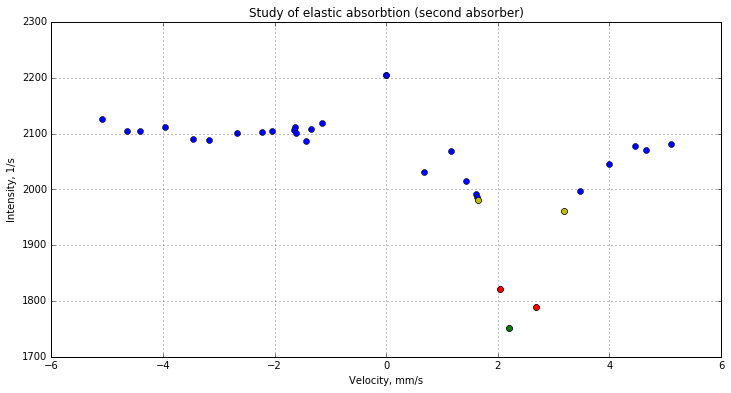

In [117]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot()

x = np.concatenate([dataAbsorber2.values.T[0], dataAbsorber2.values.T[2]]) 
y = np.concatenate([dataAbsorber2.values.T[1], dataAbsorber2.values.T[3]])

plt.xlabel(u'Velocity, mm/s')
plt.ylabel(u'Intensity, 1/s')
plt.title(u'Study of elastic absorbtion (second absorber)')
plt.grid(True)

plt.plot(x, y, 'o', color='b')
plt.plot(x[23], y[23], 'ro')
plt.plot(x[31], y[31], 'ro')
plt.plot(x[24], y[24], 'go')
plt.plot(x[22], y[22], 'yo')
plt.plot(x[26], y[26], 'yo')
plt.show()

Найдём величину химического сдвига

In [98]:
print str(round(x[24],2)) + " ± " + str(round((x[23] - x[31])/2, 2)) + " мм/с"
print str(23.8/3e08 * x[24]) + " ± " + str(((x[23] - x[31])/(2*x[24]))*(23.8/3e08 * x[24])) + " эВ"

2.2 ± 0.32 мм/с
1.74533333333e-07 ± 2.53866666667e-08 эВ


Найдём экспериментальную ширину линии 2Г.

In [118]:
print str(round(x[22] - x[26],2)) + " мм/с"
print str((x[22] - x[26])*23.8/3e08) + " эВ"

1.55 мм/с
1.22966666667e-07 эВ


Найдём амплитуду резонансного поглощения.

In [13]:
#Определим Ninf как среднее между максимальным и минимальным N в областях, где резонансное поглощение отсутствует
Ninf = 2070.8
Ninferr = np.sqrt(Ninf)
Nv = y.min()
Nverr = np.sqrt(Nv)
res = (Ninf - Nv)/(Ninf - backgroundAbsorber2)
err = res * np.sqrt(((np.sqrt(Ninferr**2 + Nverr**2))/(Ninf-Nv))**2 + (Ninferr/(Ninf-backgroundAbsorber2))**2)

print str(round(res,2) * 100) + " ± " + str(round(err,2) * 100) + "%"

16.0 ± 3.0%
